In [3]:
import numpy as np
import matplotlib.pyplot as plt

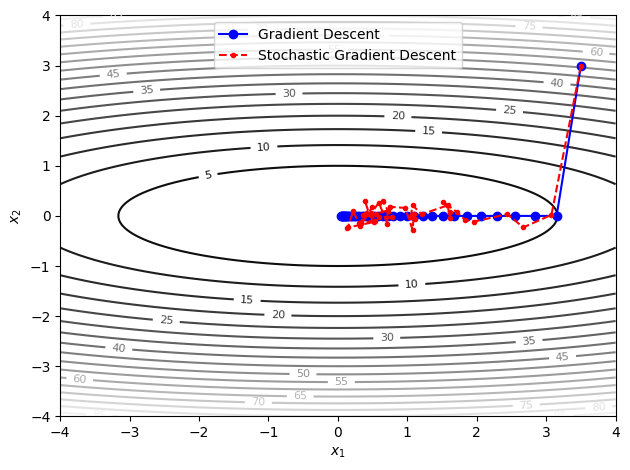

In [23]:
np.random.seed(42)

# Objective: elongated quadratic valley
def f(x):
    # x is (2,)
    return 0.5 * (x[0]**2 + 10 * x[1]**2)

def grad_f(x):
    return np.array([x[0], 10 * x[1]])

# Grid for contours
x1 = np.linspace(-4, 4, 200)
x2 = np.linspace(-4, 4, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (X1**2 + 10 * X2**2)

# Run GD and noisy SGD
x0 = np.array([3.5, 3.0])
alpha = 0.1
iters = 40

gd_path = [x0.copy()]
sgd_path = [x0.copy()]

x_gd = x0.copy()
x_sgd = x0.copy()

for k in range(iters):
    # Exact gradient
    g = grad_f(x_gd)
    x_gd = x_gd - alpha * g
    gd_path.append(x_gd.copy())
    
    # Noisy gradient
    g_true = grad_f(x_sgd)
    noise = np.random.normal(scale=1.5, size=2)
    g_noisy = g_true + noise
    x_sgd = x_sgd - alpha * g_noisy
    sgd_path.append(x_sgd.copy())

gd_path = np.array(gd_path)
sgd_path = np.array(sgd_path)

CS = plt.contour(X1, X2, Z, levels=20, cmap='gray')
plt.clabel(CS, inline=True, fontsize=8)

plt.plot(gd_path[:, 0], gd_path[:, 1], marker='o', color='blue', label='Gradient Descent')
plt.plot(sgd_path[:, 0], sgd_path[:, 1], marker='.', linestyle='--', color='red', label='Stochastic Gradient Descent')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig('figures/sgd.pdf')